In [1]:
import pandas as pd
import time
import re 
import ast
import seaborn as sns

from tqdm._tqdm_notebook import tqdm_notebook
import numpy as np
tqdm_notebook.pandas()

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

import spacy
nlp = spacy.load('en')

In [2]:
def vader_sentiment(lyric):
    score = analyser.polarity_scores(lyric)
    return score['compound']


def textblob_sentiment(lyric):
    tb = TextBlob(lyric)
    return tb.sentiment.polarity


def unique_words(lyric):
    doc = nlp.tokenizer(lyric.lower())
    return list(set(doc))
    

In [3]:
song_info = pd.read_csv('../data/song_info.txt')
song_info = song_info[song_info['lang'] == 'en']
song_info = song_info[['song_id', 'lyrics']]

reg = "[\(\[].*?[\)\]]"
song_info['lyrics'] = song_info['lyrics'].str.replace(reg, '')
song_info['lyrics'] = song_info['lyrics'].str.replace("\\r\\n", ' ')
song_info.head()

,song_id,lyrics
37,6cbqh8woSu03Vj8s1PCK9C,"Uh Here we go, that’s right Uh huh uh huh Uh h..."
85,3xIHePHJbOEtnzlwAOoCtz,He be rollin' in his jeep Cruisin' down on Ful...
123,3zb1zBmkrPF6VW8RhlSYA1,"So pay attention, babe Pay attention Our Fathe..."
124,6A8KuRrV72ZP4MneZRCsSm,I don't mean to be rude I don't mean to be ou...
125,7hphy8rtxpYshs3UzDZTzN,I run after you like a fool would do But mama ...


## Get TextBlob Sentiment Scores

In [10]:
song_info['textblob_score'] = song_info['lyrics'].progress_apply(lambda x: textblob_sentiment(x))
song_info.head()

,song_id,lyrics,textblob_score
37,6cbqh8woSu03Vj8s1PCK9C,"Uh Here we go, that’s right Uh huh uh huh Uh h...",0.218276
85,3xIHePHJbOEtnzlwAOoCtz,He be rollin' in his jeep Cruisin' down on Ful...,-0.116919
123,3zb1zBmkrPF6VW8RhlSYA1,"So pay attention, babe Pay attention Our Fathe...",-0.045307
124,6A8KuRrV72ZP4MneZRCsSm,I don't mean to be rude I don't mean to be ou...,-0.137222
125,7hphy8rtxpYshs3UzDZTzN,I run after you like a fool would do But mama ...,0.008056


## Get VADER Sentiment Scores

In [11]:
song_info['vader_score'] = song_info['lyrics'].progress_apply(lambda x: vader_sentiment(x))
song_info.head()

,song_id,lyrics,textblob_score,vader_score
37,6cbqh8woSu03Vj8s1PCK9C,"Uh Here we go, that’s right Uh huh uh huh Uh h...",0.218276,0.9095
85,3xIHePHJbOEtnzlwAOoCtz,He be rollin' in his jeep Cruisin' down on Ful...,-0.116919,0.8571
123,3zb1zBmkrPF6VW8RhlSYA1,"So pay attention, babe Pay attention Our Fathe...",-0.045307,-0.9959
124,6A8KuRrV72ZP4MneZRCsSm,I don't mean to be rude I don't mean to be ou...,-0.137222,-0.9938
125,7hphy8rtxpYshs3UzDZTzN,I run after you like a fool would do But mama ...,0.008056,0.9954


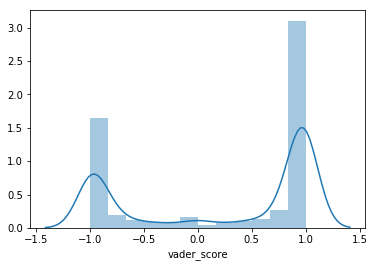

In [197]:
sns.distplot(a=song_info['vader_score'])

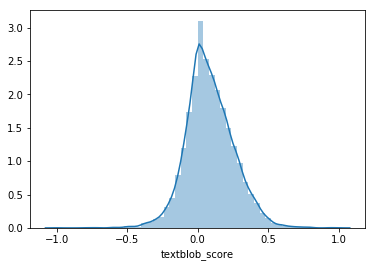

In [196]:
sns.distplot(a=song_info['textblob_score'], axlabel=None)

## Try tokenizing into unique words

In [44]:
song_info['lyrics_unique'] = song_info['lyrics'].progress_apply(lambda x: unique_words(x))
song_info.head()

,song_id,lyrics,textblob_score,vader_score,lyrics_unique
37,6cbqh8woSu03Vj8s1PCK9C,"Uh Here we go, that’s right Uh huh uh huh Uh h...",0.218276,0.9095,"[proud, aqua, ', ..., superstar, loud, reach, ..."
85,3xIHePHJbOEtnzlwAOoCtz,He be rollin' in his jeep Cruisin' down on Ful...,-0.116919,0.8571,"[wishing, fulton, around, street, slow, but, o..."
123,3zb1zBmkrPF6VW8RhlSYA1,"So pay attention, babe Pay attention Our Fathe...",-0.045307,-0.9959,"[?, need, you, !, just, little, her, ', ol', c..."
124,6A8KuRrV72ZP4MneZRCsSm,I don't mean to be rude I don't mean to be ou...,-0.137222,-0.9938,"[a, this, every, who, minds, my, cup, n't, lin..."
125,7hphy8rtxpYshs3UzDZTzN,I run after you like a fool would do But mama ...,0.008056,0.9954,"["", lost, ,, about, got, ,, baby, you, n't, i,..."


In [45]:
song_info.to_csv(path_or_buf='../data/song_info+unique.txt', encoding='utf-8', index=False)

In [60]:
song_info['uni_vader_score'] = song_info['lyrics_unique'].progress_apply(lambda x: vader_sentiment(str(x)))
song_info.head()

,song_id,lyrics,textblob_score,vader_score,lyrics_unique,uni_vader_score
37,6cbqh8woSu03Vj8s1PCK9C,"Uh Here we go, that’s right Uh huh uh huh Uh h...",0.218276,0.9095,"[proud, aqua, ', ..., superstar, loud, reach, ...",0.9016
85,3xIHePHJbOEtnzlwAOoCtz,He be rollin' in his jeep Cruisin' down on Ful...,-0.116919,0.8571,"[wishing, fulton, around, street, slow, but, o...",0.9787
123,3zb1zBmkrPF6VW8RhlSYA1,"So pay attention, babe Pay attention Our Fathe...",-0.045307,-0.9959,"[?, need, you, !, just, little, her, ', ol', c...",-0.9713
124,6A8KuRrV72ZP4MneZRCsSm,I don't mean to be rude I don't mean to be ou...,-0.137222,-0.9938,"[a, this, every, who, minds, my, cup, n't, lin...",-0.9827
125,7hphy8rtxpYshs3UzDZTzN,I run after you like a fool would do But mama ...,0.008056,0.9954,"["", lost, ,, about, got, ,, baby, you, n't, i,...",0.9287


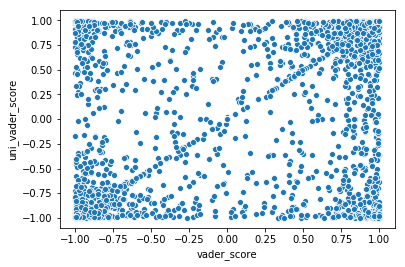

In [180]:
sns.scatterplot(x='vader_score', y='uni_vader_score', data=song_info[:5000])

In [ ]:
song_info['uni_textblob_score'] = song_info['lyrics_unique'].progress_apply(lambda x: textblob_sentiment(str(x)))

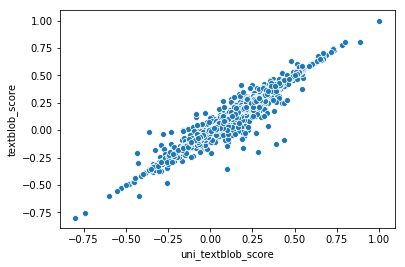

In [69]:
sns.scatterplot(x='uni_textblob_score', y='textblob_score', data=song_info[:5000])

In [73]:
song_info['vader_diff'] = np.absolute(song_info['vader_score'] - song_info['uni_vader_score'])
song_info['textblob_diff'] = np.absolute(song_info['textblob_score'] - song_info['uni_textblob_score'])

In [74]:
print(song_info['textblob_diff'].mean(), song_info['vader_diff'].mean())

0.016187174069906194 0.288667108701965


In [76]:
print(np.absolute(song_info['vader_score']).mean(), np.absolute(song_info['uni_vader_score']).mean())

0.8709837285838739 0.8660798954602652


In [77]:
print(np.absolute(song_info['textblob_score']).mean(), np.absolute(song_info['uni_textblob_score']).mean())

0.14388290134143558 0.143871860510472


In [183]:
song_info.drop(columns=['uni_vader_score', 'lyrics_unique', 'uni_textblob_score', 'vader_diff', 'textblob_diff'], inplace=True)

## Compare Musical Valence against Sentiment Scores for Lyrics

In [182]:
song_info[['song_id', 'textblob_score', 'vader_score']].to_csv('../data/sentiment_scores.txt', index=False)

In [187]:
audio_features = pd.read_csv('../data/song_info.txt')
audio_features = audio_features[['song_id', 'audio_features']]
song_info = song_info.merge(right=audio_features, on='song_id', how='inner')
song_info.head()

,song_id,lyrics,textblob_score,vader_score,audio_features
0,6cbqh8woSu03Vj8s1PCK9C,"Uh Here we go, that’s right Uh huh uh huh Uh h...",0.218276,0.9095,"{'danceability': 0.895, 'energy': 0.752, 'key'..."
1,3xIHePHJbOEtnzlwAOoCtz,He be rollin' in his jeep Cruisin' down on Ful...,-0.116919,0.8571,"{'danceability': 0.736, 'energy': 0.51, 'key':..."
2,3zb1zBmkrPF6VW8RhlSYA1,"So pay attention, babe Pay attention Our Fathe...",-0.045307,-0.9959,"{'danceability': 0.839, 'energy': 0.706, 'key'..."
3,6A8KuRrV72ZP4MneZRCsSm,I don't mean to be rude I don't mean to be ou...,-0.137222,-0.9938,"{'danceability': 0.585, 'energy': 0.65, 'key':..."
4,7hphy8rtxpYshs3UzDZTzN,I run after you like a fool would do But mama ...,0.008056,0.9954,"{'danceability': 0.787, 'energy': 0.708, 'key'..."


In [189]:
song_info['musical_valence'] = song_info.audio_features.map(lambda x: ast.literal_eval(x)['valence'])
song_info.head()

,song_id,lyrics,textblob_score,vader_score,audio_features,musical_valence
0,6cbqh8woSu03Vj8s1PCK9C,"Uh Here we go, that’s right Uh huh uh huh Uh h...",0.218276,0.9095,"{'danceability': 0.895, 'energy': 0.752, 'key'...",0.773
1,3xIHePHJbOEtnzlwAOoCtz,He be rollin' in his jeep Cruisin' down on Ful...,-0.116919,0.8571,"{'danceability': 0.736, 'energy': 0.51, 'key':...",0.572
2,3zb1zBmkrPF6VW8RhlSYA1,"So pay attention, babe Pay attention Our Fathe...",-0.045307,-0.9959,"{'danceability': 0.839, 'energy': 0.706, 'key'...",0.714
3,6A8KuRrV72ZP4MneZRCsSm,I don't mean to be rude I don't mean to be ou...,-0.137222,-0.9938,"{'danceability': 0.585, 'energy': 0.65, 'key':...",0.733
4,7hphy8rtxpYshs3UzDZTzN,I run after you like a fool would do But mama ...,0.008056,0.9954,"{'danceability': 0.787, 'energy': 0.708, 'key'...",0.962


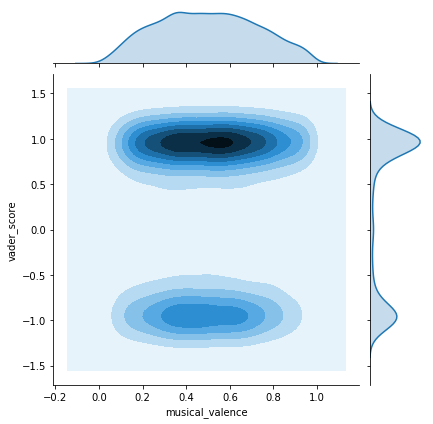

In [202]:
sns.jointplot(x='musical_valence', y='vader_score', data=song_info, kind='kde')

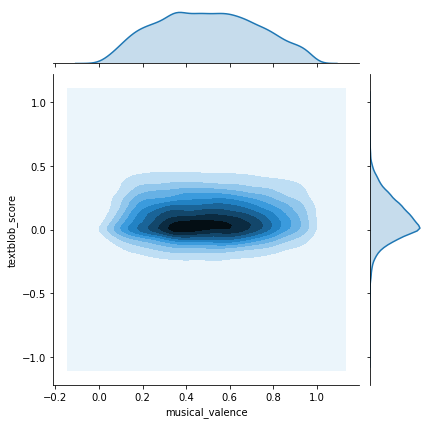

In [201]:
sns.jointplot(x='musical_valence', y='textblob_score', data=song_info, kind='kde')

## Conclusion
Not much correlation between VADER and TextBlob. There also seems to be a skew towards positive and negative extremes, which I am guessing is due to the repetitive nature of lyrics. I tried tokenizing the lyrics into unique words before performing sentiment analysis, but realized that this wouldn't work well since the sequence of words matters when performing sentiment analysis.